In [47]:
import pandas as pd
import numpy as np
from zopi.spatial import create_circle
import geopandas as gpd

In [37]:
def gen_nombre(tam):
    nombres = []
    for n in range(tam):
    
        nombre = []
        for i in range(5):
            nombre.append(np.random.choice(list('qwertyuiopasdfghjklzxcvbnm')))
        nombre=''.join(nombre)
        nombres.append(nombre)
    return nombres

In [39]:
n = 60
sample_places = pd.read_csv('carpetas_completa_marzo_2022.csv',
                            usecols=["longitud", "latitud"],
                           nrows=n).dropna()
sample_places= (sample_places
                .assign(nombre =  gen_nombre(tam = sample_places.shape[0]))
                .set_index('nombre'))

In [44]:
circulos = []
r = 250
for row in sample_places.itertuples():
    circulos.append(create_circle(latitud=row.latitud, longitud=row.longitud, radio_metros=r))

In [50]:
sample_places= (sample_places
 .assign(geometry= circulos)
.pipe(gpd.GeoDataFrame))

<AxesSubplot:>

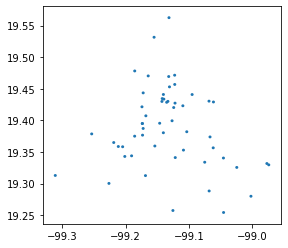

In [51]:
sample_places.plot()

In [57]:
sample_places.to_file('data/places.geojson', driver = 'GeoJSON')